In [1]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('weather_data.db')

# Create a cursor object to interact with the database
cursor = conn.cursor()

# Define your SQL query to select all data from a specific table
table_name = 'weather'  # Replace with your table name
query = f"SELECT * FROM {table_name}"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
rows = cursor.fetchall()

# Print the results
print(f"Data from table {table_name}:")
for row in rows:
    print(row)

# Close the cursor and connection
cursor.close()
conn.close()

Data from table weather:
(1, 'Ahmednagar', 23.260000000000048, 23.99000000000001, 90, 5.69, '2024-07-30 06:07:09', '2024-07-30 19:07:39', 'overcast clouds', '2024-07-29 18:42:12')
(2, 'Parbhani', 24.24000000000001, 25.04000000000002, 89, 2.65, '2024-07-30 05:58:40', '2024-07-30 18:59:44', 'overcast clouds', '2024-07-29 18:42:12')
(3, 'Palghar', 27.170000000000016, 30.77000000000004, 86, 6.51, '2024-07-30 06:14:10', '2024-07-30 19:16:30', 'overcast clouds', '2024-07-29 18:42:12')
(4, 'Dhule', 25.260000000000048, 26.090000000000032, 86, 3.35, '2024-07-30 06:04:08', '2024-07-30 19:10:16', 'broken clouds', '2024-07-29 18:42:13')
(5, 'Hingoli', 24.02000000000004, 24.850000000000023, 91, 3.28, '2024-07-30 05:56:30', '2024-07-30 18:58:58', 'overcast clouds', '2024-07-29 18:42:13')
(6, 'Akola', 24.470000000000027, 25.32000000000005, 90, 2.31, '2024-07-30 05:55:32', '2024-07-30 19:01:09', 'overcast clouds', '2024-07-29 18:42:13')
(7, 'Aurangabad', 25.05000000000001, 25.910000000000025, 88, 2.57

In [2]:
import sqlite3

# Function to fetch and print table data
def print_table_data():
    # Connect to the SQLite database
    conn = sqlite3.connect('weather_data.db')
    cursor = conn.cursor()

    # Get the column names
    cursor.execute('PRAGMA table_info(weather)')
    columns = [column[1] for column in cursor.fetchall()]

    # Get all the rows from the table
    cursor.execute('SELECT * FROM weather')
    rows = cursor.fetchall()

    # Close the connection to the database
    conn.close()

    # Print the column names
    print(" | ".join(columns))
    print("-" * (len(columns) * 20))

    # Print each row
    for row in rows:
        print(" | ".join(str(value) for value in row))

# Call the function to print table data
print_table_data()


id | city | temperature | feels_like | humidity | wind_speed | sunrise_time | sunset_time | description | timestamp
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1 | Ahmednagar | 23.260000000000048 | 23.99000000000001 | 90 | 5.69 | 2024-07-30 06:07:09 | 2024-07-30 19:07:39 | overcast clouds | 2024-07-29 18:42:12
2 | Parbhani | 24.24000000000001 | 25.04000000000002 | 89 | 2.65 | 2024-07-30 05:58:40 | 2024-07-30 18:59:44 | overcast clouds | 2024-07-29 18:42:12
3 | Palghar | 27.170000000000016 | 30.77000000000004 | 86 | 6.51 | 2024-07-30 06:14:10 | 2024-07-30 19:16:30 | overcast clouds | 2024-07-29 18:42:12
4 | Dhule | 25.260000000000048 | 26.090000000000032 | 86 | 3.35 | 2024-07-30 06:04:08 | 2024-07-30 19:10:16 | broken clouds | 2024-07-29 18:42:13
5 | Hingoli | 24.02000000000004 | 24.850000000000023 | 91 | 3.28 | 2024-07-30 05:56:30 

In [3]:
import sqlite3
import pandas as pd

def get_average_temperature(city):
    conn = sqlite3.connect('weather_data.db')
    query = f"SELECT AVG(temperature) FROM weather WHERE city='{city}'"
    avg_temp = pd.read_sql_query(query, conn).iloc[0, 0]
    conn.close()
    return avg_temp

def get_humidity_trends(city):
    conn = sqlite3.connect('weather_data.db')
    query = f"SELECT timestamp, humidity FROM weather WHERE city='{city}' ORDER BY timestamp"
    humidity_data = pd.read_sql_query(query, conn)
    conn.close()
    return humidity_data

# Example Usage
print(f'Averge Temperature of Maharashtra at night is {get_average_temperature("Mumbai")}')
print(f'Humidity of mumbai is {get_humidity_trends("Mumbai")}')


Averge Temperature of Maharashtra at night is 27.49000000000001
Humidity of mumbai is              timestamp  humidity
0  2024-07-29 18:42:17        83
1  2024-07-29 19:42:27        83
2  2024-07-29 20:42:37        89
3  2024-07-29 21:42:47        89
4  2024-07-29 22:42:57        89
5  2024-07-29 23:43:06        83
6  2024-07-30 00:43:16        89
7  2024-07-30 01:43:26        83
8  2024-07-30 02:43:36        83
9  2024-07-30 03:43:46        89


In [4]:
import sqlite3
import pandas as pd

def create_dataframe_from_db(db_file):
    # Connect to the SQLite database
    conn = sqlite3.connect('weather_data.db')
    
    # Read data from the weather table into a DataFrame
    query = "SELECT * FROM weather"
    df = pd.read_sql_query(query, conn)
    
    # Close the connection
    conn.close()
    
    return df

# Example usage
df = create_dataframe_from_db('weather_data.db')

# Display the first few rows of the DataFrame
df.head()


,id,city,temperature,feels_like,humidity,wind_speed,sunrise_time,sunset_time,description,timestamp
0,1,Ahmednagar,23.26,23.99,90,5.69,2024-07-30 06:07:09,2024-07-30 19:07:39,overcast clouds,2024-07-29 18:42:12
1,2,Parbhani,24.24,25.04,89,2.65,2024-07-30 05:58:40,2024-07-30 18:59:44,overcast clouds,2024-07-29 18:42:12
2,3,Palghar,27.17,30.77,86,6.51,2024-07-30 06:14:10,2024-07-30 19:16:30,overcast clouds,2024-07-29 18:42:12
3,4,Dhule,25.26,26.09,86,3.35,2024-07-30 06:04:08,2024-07-30 19:10:16,broken clouds,2024-07-29 18:42:13
4,5,Hingoli,24.02,24.85,91,3.28,2024-07-30 05:56:30,2024-07-30 18:58:58,overcast clouds,2024-07-29 18:42:13


# Analyze DataFrames

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            300 non-null    int64  
 1   city          300 non-null    object 
 2   temperature   300 non-null    float64
 3   feels_like    300 non-null    float64
 4   humidity      300 non-null    int64  
 5   wind_speed    300 non-null    float64
 6   sunrise_time  300 non-null    object 
 7   sunset_time   300 non-null    object 
 8   description   300 non-null    object 
 9   timestamp     300 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 23.6+ KB


In [6]:
df.shape

(300, 10)

In [7]:
df.columns

Index(['id', 'city', 'temperature', 'feels_like', 'humidity', 'wind_speed',
       'sunrise_time', 'sunset_time', 'description', 'timestamp'],
      dtype='object')

In [8]:
df.dtypes

id                int64
city             object
temperature     float64
feels_like      float64
humidity          int64
wind_speed      float64
sunrise_time     object
sunset_time      object
description      object
timestamp        object
dtype: object

In [9]:
df['description'].unique()

array(['overcast clouds', 'broken clouds', 'haze', 'scattered clouds',
       'drizzle', 'mist'], dtype=object)

In [10]:
df.nunique()

id              300
city             30
temperature     203
feels_like      213
humidity         23
wind_speed      234
sunrise_time     30
sunset_time      30
description       6
timestamp       100
dtype: int64

In [11]:
 df['description'].value_counts()

description
overcast clouds     237
broken clouds        33
mist                 16
haze                 11
drizzle               2
scattered clouds      1
Name: count, dtype: int64

## Find all the unique 'Wind Speed' values in the data

In [12]:
df['wind_speed'].nunique()

234

## Find the number of times when the 'Weather is exactly Clear

In [13]:
df[df.description == 'Clear']

,id,city,temperature,feels_like,humidity,wind_speed,sunrise_time,sunset_time,description,timestamp


### 😁 Rainy Season 😁

---

![Description of Image](Wind_Scale.png)


## Find the Number of times when wind speen is Maximum, Minimum, Mode

In [14]:
max_temp = df['wind_speed'].max()
min_temp = df['wind_speed'].min()

### Maximum

In [15]:
df[df['wind_speed'] == max_temp]

,id,city,temperature,feels_like,humidity,wind_speed,sunrise_time,sunset_time,description,timestamp
294,295,Solapur,26.93,29.23,76,8.42,2024-07-30 06:04:32,2024-07-30 19:00:48,overcast clouds,2024-07-30 03:43:48


### Minimum 

In [16]:
df[df['wind_speed'] == min_temp]

,id,city,temperature,feels_like,humidity,wind_speed,sunrise_time,sunset_time,description,timestamp
185,186,Akola,24.79,25.67,90,0.8,2024-07-30 05:55:32,2024-07-30 19:01:09,overcast clouds,2024-07-30 00:43:13


### Mode

In [17]:
df['wind_speed'].mode().value_counts()

wind_speed
6.17    1
Name: count, dtype: int64

## Rename the column name 'description' of the dataframe to 'Weather Conditions'.

In [18]:
df.rename(columns = {'description' : 'Weather Condition'},  inplace = True)

In [19]:
df.head()

,id,city,temperature,feels_like,humidity,wind_speed,sunrise_time,sunset_time,Weather Condition,timestamp
0,1,Ahmednagar,23.26,23.99,90,5.69,2024-07-30 06:07:09,2024-07-30 19:07:39,overcast clouds,2024-07-29 18:42:12
1,2,Parbhani,24.24,25.04,89,2.65,2024-07-30 05:58:40,2024-07-30 18:59:44,overcast clouds,2024-07-29 18:42:12
2,3,Palghar,27.17,30.77,86,6.51,2024-07-30 06:14:10,2024-07-30 19:16:30,overcast clouds,2024-07-29 18:42:12
3,4,Dhule,25.26,26.09,86,3.35,2024-07-30 06:04:08,2024-07-30 19:10:16,broken clouds,2024-07-29 18:42:13
4,5,Hingoli,24.02,24.85,91,3.28,2024-07-30 05:56:30,2024-07-30 18:58:58,overcast clouds,2024-07-29 18:42:13


## Whats is the Variance of 'Humidity' in the data?

In [20]:
df['humidity'].var()

17.340858416945373

## Find All instances when 'drizzle' was recorded

In [21]:
df[df['Weather Condition'] == 'drizzle']

,id,city,temperature,feels_like,humidity,wind_speed,sunrise_time,sunset_time,Weather Condition,timestamp
135,136,Mumbai,26.99,30.60,89,4.12,2024-07-30 06:14:48,2024-07-30 19:15:05,drizzle,2024-07-29 22:42:57
149,150,Thane,26.95,30.49,89,4.12,2024-07-30 06:14:02,2024-07-30 19:14:54,drizzle,2024-07-29 22:43:01


## What is the Minimum & Maximum value of each column against each 'Weather Condition'?

In [22]:
df.groupby('Weather Condition').min()

,id,city,temperature,feels_like,humidity,wind_speed,sunrise_time,sunset_time,timestamp
Weather Condition,,,,,,,,,
broken clouds,4,Bhandara,22.58,23.33,78,1.58,2024-07-30 05:44:15,2024-07-30 18:50:44,2024-07-29 18:42:13
drizzle,136,Mumbai,26.95,30.49,89,4.12,2024-07-30 06:14:02,2024-07-30 19:14:54,2024-07-29 22:42:57
haze,7,Aurangabad,25.05,25.91,83,1.03,2024-07-30 05:46:28,2024-07-30 18:53:24,2024-07-29 18:42:14
mist,143,Aurangabad,24.05,24.97,83,1.03,2024-07-30 05:46:28,2024-07-30 18:53:24,2024-07-29 22:42:59
overcast clouds,1,Ahmednagar,21.61,22.33,76,0.80,2024-07-30 05:44:15,2024-07-30 18:50:44,2024-07-29 18:42:12
scattered clouds,77,Bhandara,23.50,24.36,94,1.85,2024-07-30 05:44:15,2024-07-30 18:51:14,2024-07-29 20:42:37


In [23]:
df.groupby('Weather Condition').max()

,id,city,temperature,feels_like,humidity,wind_speed,sunrise_time,sunset_time,timestamp
Weather Condition,,,,,,,,,
broken clouds,287,Ratnagiri,28.12,32.95,95,7.77,2024-07-30 06:16:03,2024-07-30 19:16:30,2024-07-30 03:43:46
drizzle,150,Thane,26.99,30.60,89,4.12,2024-07-30 06:14:48,2024-07-30 19:15:05,2024-07-29 22:43:01
haze,293,Thane,27.99,32.54,94,4.63,2024-07-30 06:14:48,2024-07-30 19:15:05,2024-07-30 03:43:48
mist,270,Thane,27.99,32.54,100,6.17,2024-07-30 06:14:48,2024-07-30 19:15:05,2024-07-30 02:43:40
overcast clouds,300,Yavatmal,28.84,34.30,97,8.42,2024-07-30 06:16:03,2024-07-30 19:16:30,2024-07-30 03:43:50
scattered clouds,77,Bhandara,23.50,24.36,94,1.85,2024-07-30 05:44:15,2024-07-30 18:51:14,2024-07-29 20:42:37


## The “Goldilocks” Zone of Humidity

In [24]:
# Filter the DataFrame for humidity between 40 and 60
df[(df['humidity'] >= 40) & (df['humidity'] <= 60)]

,id,city,temperature,feels_like,humidity,wind_speed,sunrise_time,sunset_time,Weather Condition,timestamp


### 😁 Rainy Season 😁

---

## Calculate Average Temperatur

# Temperature 

In [25]:
# Calculate the average temperature for each city
average_temperatures = df.groupby('city')['temperature'].mean().reset_index()
average_temperatures.columns = ['city', 'average_temperature']

average_temperatures


,city,average_temperature
0,Ahmednagar,23.398
1,Akola,24.967
2,Amravati,23.924
3,Aurangabad,23.715
4,Beed,22.702
5,Bhandara,24.511
6,Buldhana,23.384
7,Chandrapur,25.702
8,Dhule,25.080
9,Hingoli,24.278


In [26]:
df['temperature'].describe()

count    300.000000
mean      24.458833
std        1.634163
min       21.610000
25%       23.127500
50%       24.065000
75%       25.547500
max       28.840000
Name: temperature, dtype: float64

## Histogram of Temperatures

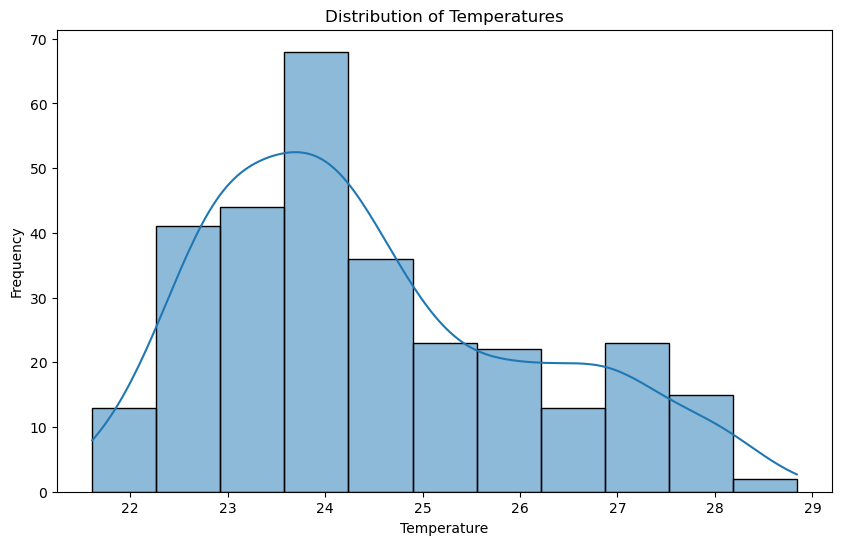

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['temperature'], kde=True)
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


## Box Plot of Temperatures by City

**Histogram:**
- **Temperature Range:** The temperature data ranges from 22°C to 29°C.
- **Frequency Distribution:** The highest frequency of temperatures is around 24°C. The distribution appears to be right-skewed, indicating that lower temperatures are more common than higher ones.

**KDE (Kernel Density Estimate) Plot:**
- The KDE plot overlays the histogram and provides a smoothed estimate of the probability density function of the temperature data.
- The peak of the KDE plot is around 24°C, aligning with the highest bar in the histogram.


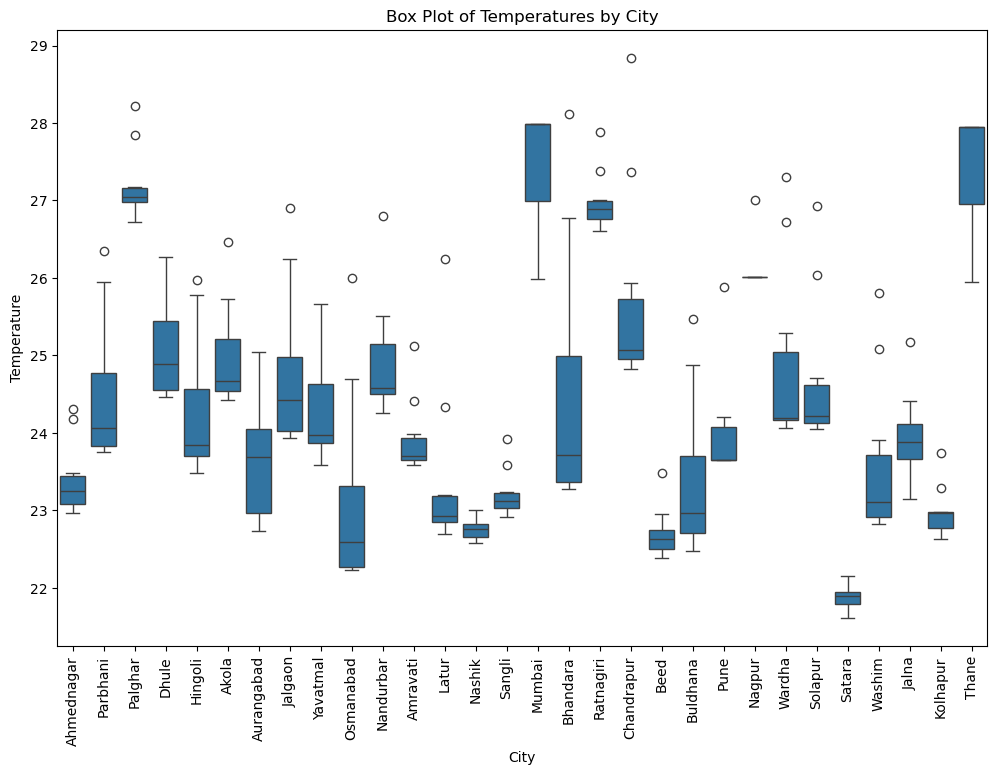

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='temperature', data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Temperatures by City')
plt.xlabel('City')
plt.ylabel('Temperature')
plt.show()


**Box Plot:**
- **Cities:** Multiple cities are listed along the x-axis, each with a corresponding box plot for temperature.
- **Temperature Distribution:** 
  - Most cities have median temperatures between 23°C and 27°C.
  - Cities like Hingoli and Thane have higher median temperatures, closer to 27°C.
  - Cities like Satara and Nandurbar have lower median temperatures, around 23°C.
- **Variability:**
  - There is significant variability in temperatures within some cities, indicated by the length of the whiskers and the presence of outliers.
  - Cities like Jalna and Ratnagiri show more spread in their temperature data.
- **Outliers:** Several cities have outliers, indicating occasional temperatures that deviate significantly from the median.


## Average Temperature per City

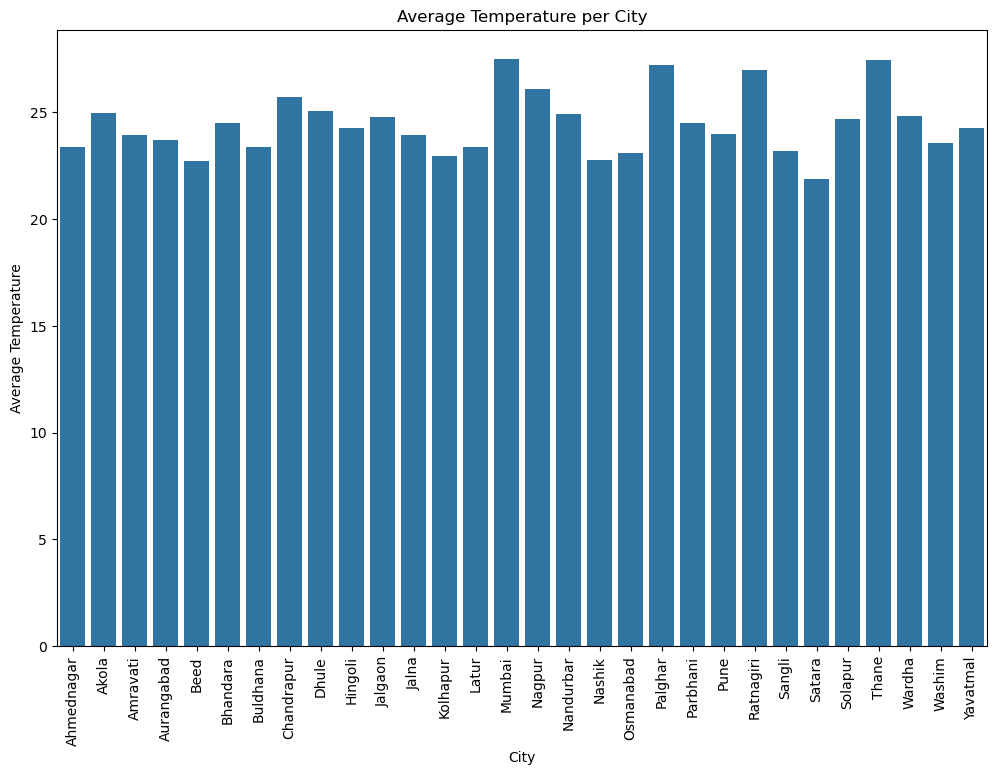

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(x='city', y='average_temperature', data=average_temperatures)
plt.xticks(rotation=90)
plt.title('Average Temperature per City')
plt.xlabel('City')
plt.ylabel('Average Temperature')
plt.show()


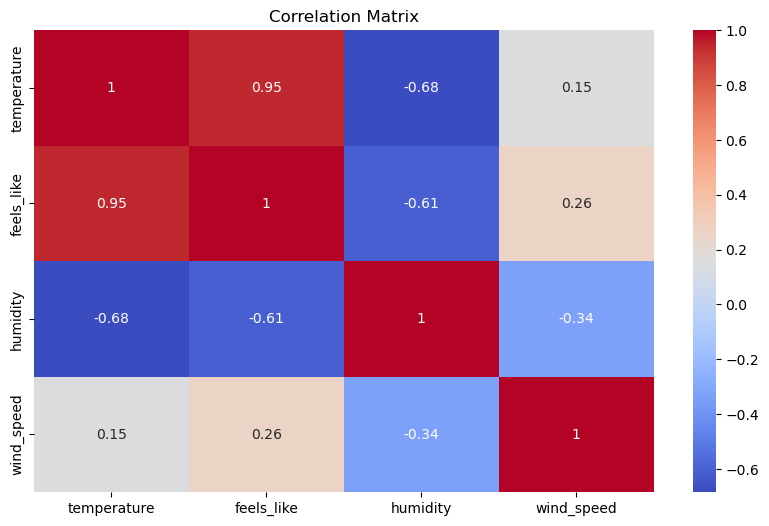

In [30]:
correlation_matrix = df[['temperature', 'feels_like', 'humidity', 'wind_speed']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Maharashtra Temperature at Night 

In [31]:
average_night_temperature = average_temperatures['average_temperature'].mean()
print(f"At night, the average temperature in Maharashtra is {average_night_temperature:.2f}°C.")

At night, the average temperature in Maharashtra is 24.46°C.


## Temperature Over Time

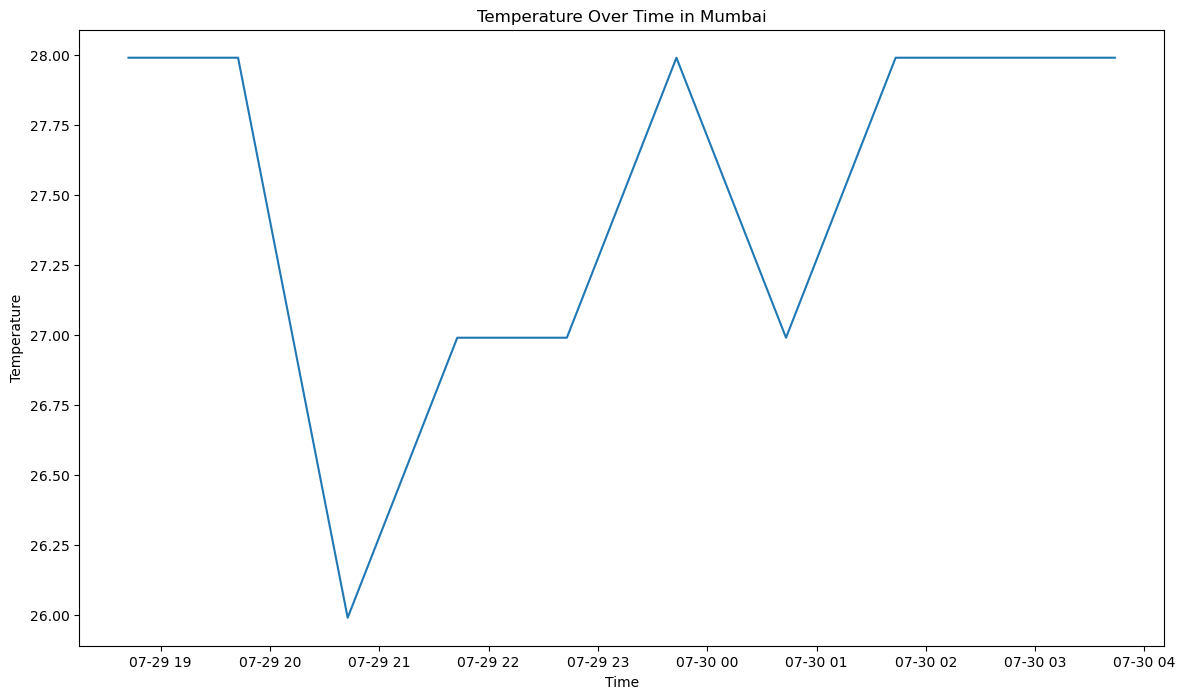

In [32]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

mumbai_df = df[df['city'] == 'Mumbai']

# Line plot of temperature over time for Mumbai
plt.figure(figsize=(14, 8))
sns.lineplot(x='timestamp', y='temperature', data=mumbai_df)
plt.title('Temperature Over Time in Mumbai')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

**Temperature Over Time in Mumbai :** 
This line chart depicts the temperature changes over a specific period in Mumbai. The following observations can be made:

- The temperature starts at 28°C and drops sharply around 20:00 to 26°C.
- It gradually increases back to around 27°C by 22:00.
- There is a noticeable peak at midnight, where the temperature reaches approximately 28°C again.
- Following this, the temperature dips once more around 02:00 and then stabilizes around 28°C by the end of the observed period.

## Temperature and Humidity Relationship

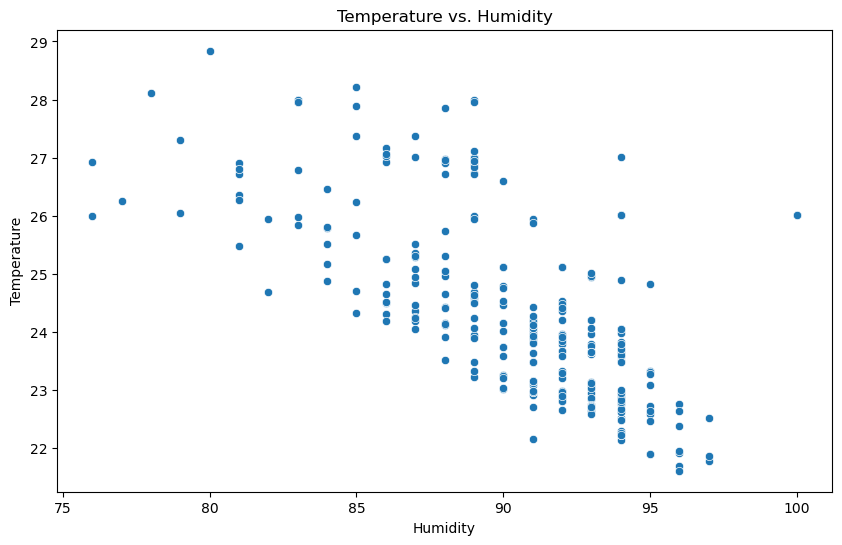

In [33]:
# Scatter plot of temperature vs. humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity', y='temperature', data=df)
plt.title('Temperature vs. Humidity')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()


**Temperature vs. Humidity :** 
This scatter plot examines the relationship between temperature and humidity in Mumbai. Key insights include:

- There is an inverse relationship between temperature and humidity; as humidity increases, the temperature tends to decrease.
- Temperatures range from 22°C to 29°C, while humidity levels range from 75% to 100%.
- Higher temperatures (above 26°C) are associated with lower humidity levels (below 85%).
- Lower temperatures (below 24°C) often correspond to higher humidity levels (above 90%).

## Temperature by Weather Condition

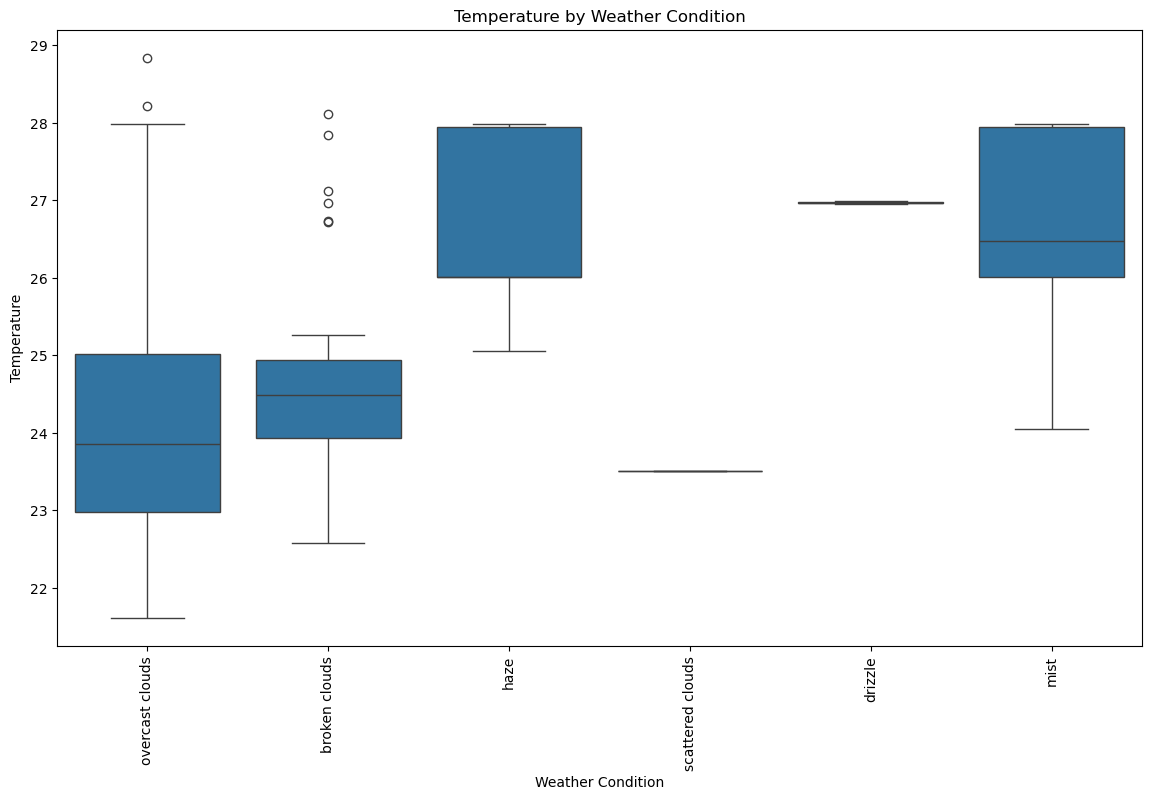

In [34]:
# Box plot of temperature by weather condition
plt.figure(figsize=(14, 8))
sns.boxplot(x='Weather Condition', y='temperature', data=df)
plt.title('Temperature by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Temperature')
plt.xticks(rotation=90)
plt.show()

**Temperature by Weather Condition :** 
This box plot illustrates the variation in temperature across different weather conditions in Mumbai. Observations are:

- **Overcast Clouds**: The temperature ranges from 22°C to 28°C, with a median around 24°C. There are a few outliers above 28°C.
- **Broken Clouds**: The temperature is slightly higher, ranging from 23°C to 27°C, with a median around 25°C.
- **Haze**: This condition shows higher temperatures, with a range from 25°C to 28°C and a median around 27°C.
- **Scattered Clouds**: Limited data points indicate a narrow temperature range around 26°C.
- **Drizzle**: Also shows a narrow temperature range, around 25°C.
- **Mist**: Exhibits a temperature range from 24°C to 28°C, with a median around 27°C, indicating higher temperatures compared to other conditions.

## Geographic Visualization

In [35]:
from opencage.geocoder import OpenCageGeocode

# Initialize OpenCageGeocode with your API key
key = 'b2757b31cbdb42c585945df5ca9eb090'  # OpenCage API key
geocoder = OpenCageGeocode(key)

def get_lat_lon(city_name):
    result = geocoder.geocode(f"{city_name}, Maharashtra, India")
    if result and len(result) > 0:
        location = result[0]
        return location['geometry']['lat'], location['geometry']['lng']
    return None, None

# Get latitude and longitude for each city
average_temperatures[['latitude', 'longitude']] = average_temperatures['city'].apply(lambda x: pd.Series(get_lat_lon(x)))

print(average_temperatures)


          city  average_temperature   latitude  longitude
0   Ahmednagar               23.398  19.162772  74.858024
1        Akola               24.967  20.761812  77.192116
2     Amravati               23.924  21.154541  77.644296
3   Aurangabad               23.715  19.877263  75.339024
4         Beed               22.702  18.991844  75.909784
5     Bhandara               24.511  21.122587  79.794509
6     Buldhana               23.384  20.562845  76.408699
7   Chandrapur               25.702  20.096756  79.504548
8        Dhule               25.080  21.130522  74.490061
9      Hingoli               24.278  19.543116  77.173943
10     Jalgaon               24.770  20.842883  75.526125
11       Jalna               23.952  19.918833  75.870860
12    Kolhapur               22.981  16.702841  74.240533
13       Latur               23.393  18.351591  76.755424
14      Mumbai               27.490  19.078545  72.878176
15      Nagpur               26.110  21.149813  79.082056
16   Nandurbar

### Plot on a Map

In [36]:
import folium

# Create a base map centered around Maharashtra
map_center = [average_temperatures['latitude'].mean(), average_temperatures['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=6)

# Add markers to the map
for idx, row in average_temperatures.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['city']}<br>Average Temperature: {row['average_temperature']:.2f}°C",
        icon=folium.Icon(color='blue')
    ).add_to(mymap)

# Save the map to an HTML file
mymap.save('maharashtra_city_avg_temperature_map.html')


In [37]:
from IPython.display import IFrame

# Display the map
IFrame('maharashtra_city_avg_temperature_map.html', width=800, height=600)


# Humidity

In [38]:
df['humidity'].describe()

count    300.000000
mean      90.116667
std        4.164236
min       76.000000
25%       88.000000
50%       91.000000
75%       93.000000
max      100.000000
Name: humidity, dtype: float64

## Histogram of Humidity

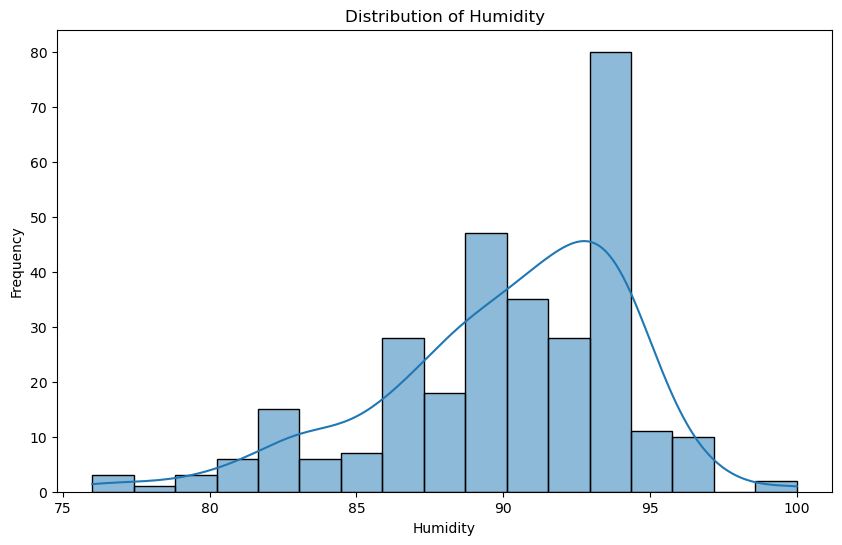

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['humidity'], kde=True)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()


## Box Plot of Humidity by City

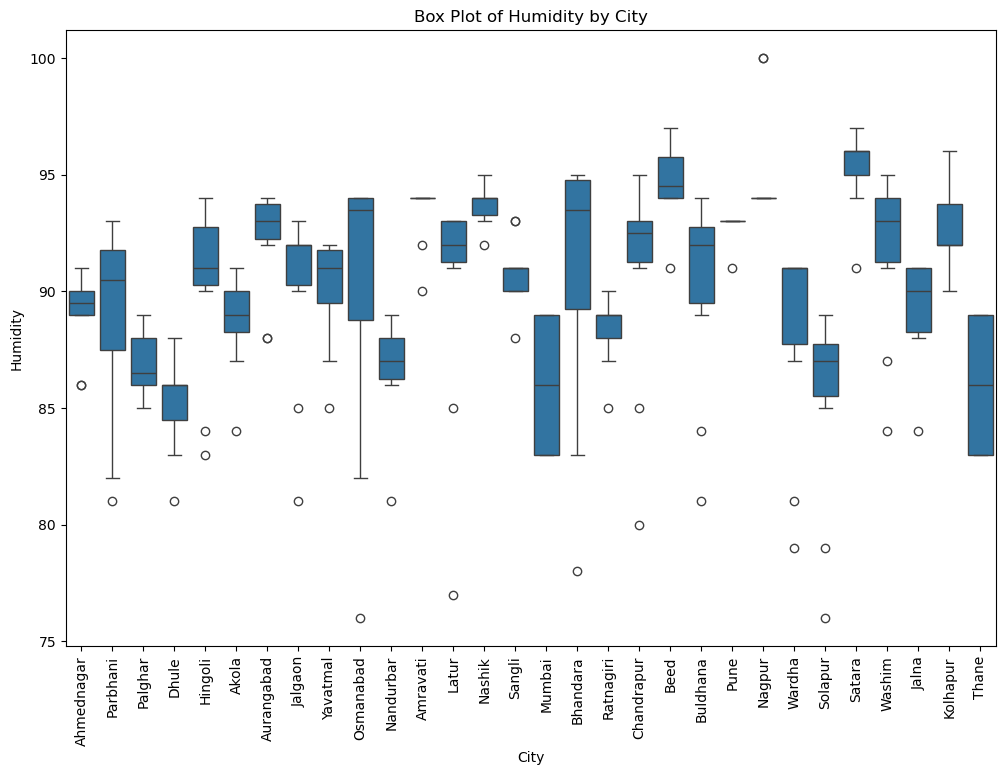

In [40]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='humidity', data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Humidity by City')
plt.xlabel('City')
plt.ylabel('Humidity')
plt.show()


#### Box Plot of Humidity by City

1. **General Observation**:
    - The humidity levels across the different cities show variability, with most cities having median humidity levels between 85% and 95%.
  
2. **City-specific Observations**:
    - **Ahmednagar, Parbhani, and Palghar**: These cities have relatively high median humidity levels, around 90%. Ahmednagar shows a few outliers below 85%.
    - **Dhule and Hingoli**: These cities have wider ranges of humidity with a few outliers below 80%, indicating more variability.
    - **Mumbai**: As expected, Mumbai shows high median humidity around 95% with less variability.
    - **Nagpur, Wardha, Solapur, and Satara**: These cities have lower median humidity around 85% to 90%, with several outliers.

3. **Outliers**:
    - Outliers are present in most cities, with a few cities like Chandrapur, Beed, and Wardha showing more extreme values, indicating occasional significant deviations from the median humidity levels.

4. **Range and IQR**:
    - Cities like Dhule and Hingoli have a wider range and interquartile range (IQR), suggesting more fluctuations in humidity levels.
    - Cities like Mumbai and Thane have relatively narrow IQR, indicating more stable humidity levels.


## Scatter Plots of Humidity vs. Other Numerical Columns

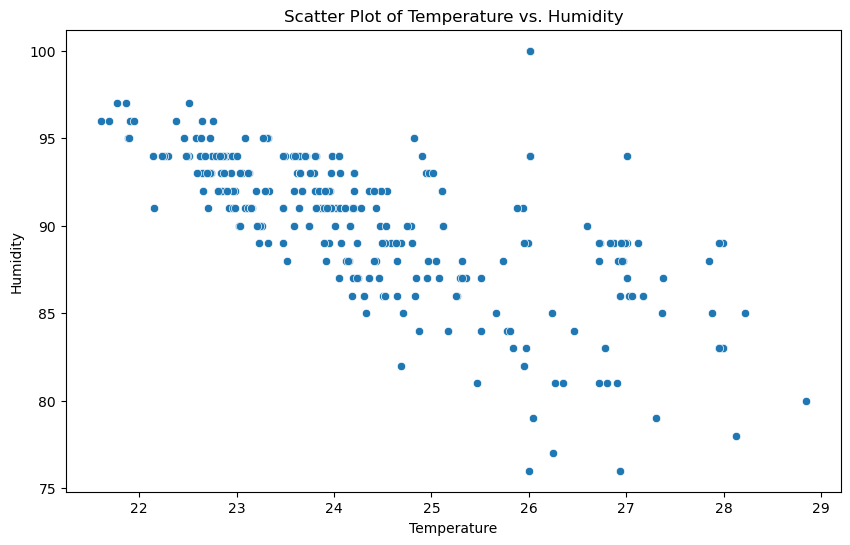

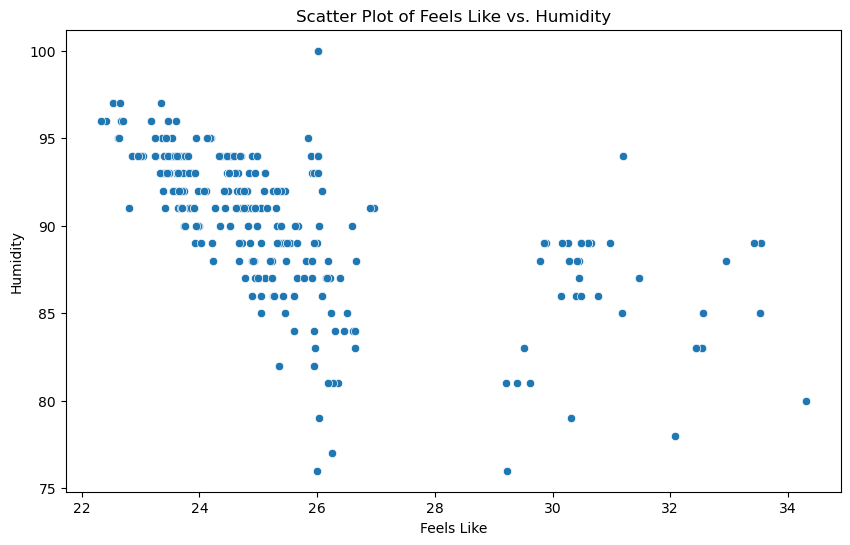

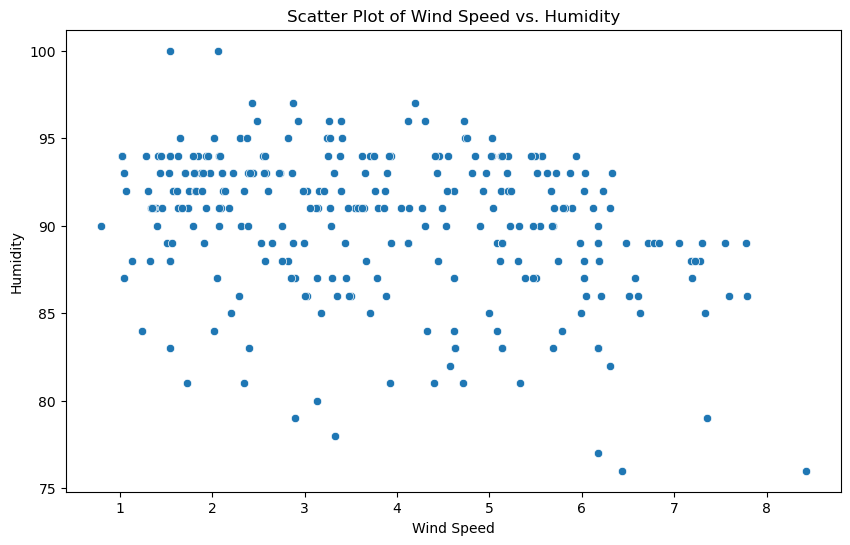

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', data=df)
plt.title('Scatter Plot of Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='feels_like', y='humidity', data=df)
plt.title('Scatter Plot of Feels Like vs. Humidity')
plt.xlabel('Feels Like')
plt.ylabel('Humidity')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind_speed', y='humidity', data=df)
plt.title('Scatter Plot of Wind Speed vs. Humidity')
plt.xlabel('Wind Speed')
plt.ylabel('Humidity')
plt.show()


## Pair Plot

<Figure size 1200x1000 with 0 Axes>

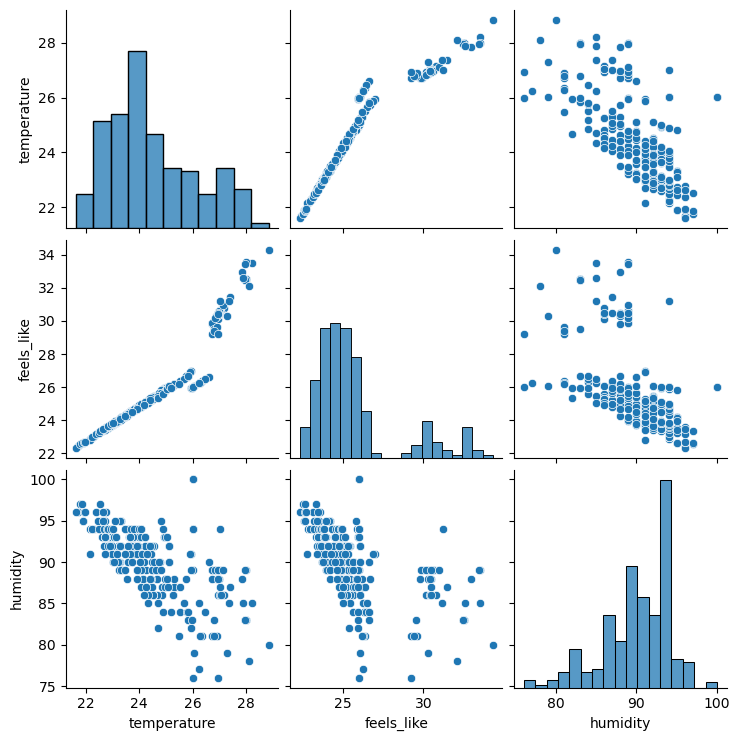

In [42]:
plt.figure(figsize=(12, 10))
sns.pairplot(df[['temperature', 'feels_like', 'humidity']])
plt.show()

#### Pair Plot Analysis

1. **Temperature vs. Feels Like**:
    - There is a strong positive correlation between temperature and feels-like temperature. This is expected as the feels-like temperature is often a function of the actual temperature.

2. **Humidity Distribution**:
    - The histogram for humidity shows that most observations are clustered around the 85% to 95% range.
    - There is a noticeable skew in the humidity data with a few observations below 80%.

3. **Temperature vs. Humidity**:
    - There is a negative correlation between temperature and humidity, indicating that higher temperatures are associated with lower humidity levels. This could be due to the effect of heat reducing relative humidity.

4. **Feels Like vs. Humidity**:
    - Similar to temperature, there is a negative correlation between feels-like temperature and humidity. Higher feels-like temperatures are associated with lower humidity levels.


## Correlation Analysis

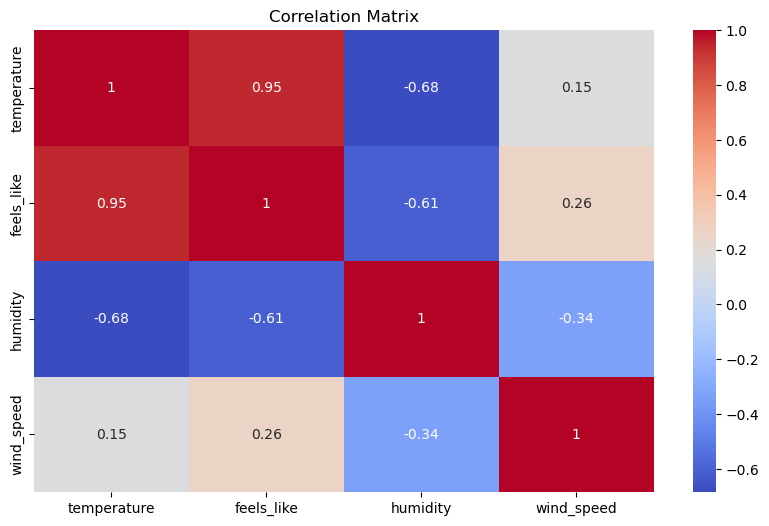

In [43]:
correlation_matrix = df[['temperature', 'feels_like', 'humidity', 'wind_speed']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Insights from the Correlation Matrix

#### General Observations

- The correlation matrix provides insights into the linear relationships between temperature, feels-like temperature, humidity, and wind speed. 
- Correlation values range from -1 to 1, where values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values around 0 indicate no linear correlation.

#### Detailed Analysis

1. **Temperature and Feels Like**:
    - **Correlation: 0.95** 
    - There is a very strong positive correlation between temperature and feels-like temperature. This suggests that as the actual temperature increases, the feels-like temperature also increases almost proportionally. This is expected because feels-like temperature often factors in actual temperature.

2. **Temperature and Humidity**:
    - **Correlation: -0.68**
    - There is a strong negative correlation between temperature and humidity. This indicates that higher temperatures are generally associated with lower humidity levels. This can be attributed to the fact that warmer air can hold more moisture, reducing relative humidity.

3. **Temperature and Wind Speed**:
    - **Correlation: 0.15**
    - There is a weak positive correlation between temperature and wind speed. This suggests that temperature has a minimal direct relationship with wind speed, though slightly higher temperatures might be associated with higher wind speeds.

4. **Feels Like and Humidity**:
    - **Correlation: -0.61**
    - There is a strong negative correlation between feels-like temperature and humidity. Similar to the relationship between temperature and humidity, higher feels-like temperatures tend to be associated with lower humidity levels.

5. **Feels Like and Wind Speed**:
    - **Correlation: 0.26**
    - There is a weak positive correlation between feels-like temperature and wind speed. This indicates that wind speed has a slight influence on feels-like temperature, possibly due to wind chill or enhanced cooling effects.

6. **Humidity and Wind Speed**:
    - **Correlation: -0.34**
    - There is a moderate negative correlation between humidity and wind speed. Higher wind speeds tend to be associated with lower humidity levels, possibly due to the drying effect of wind.


# **Conclusion**

In conclusion, our comprehensive analysis of temperature and humidity patterns across Maharashtra reveals significant variability among cities, with notable correlations between temperature, humidity, and feels-like temperature. The data shows a clear inverse relationship between temperature and humidity, highlighting how higher temperatures often coincide with lower humidity levels. 

Geographic and temporal analyses, particularly focused on **Mumbai**, illustrate how weather conditions fluctuate over time, providing valuable insights for **urban planning**, **agriculture**, and **public health initiatives**. These findings underscore the importance of localized climatic studies in developing tailored strategies to mitigate the impacts of climate change and enhance regional resilience.
